In [29]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
#ip install earthypy
import earthpy as et
import numpy as np

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [69]:
lst_cg = pd.read_csv("/Users/maryzaradich/Desktop/NASA/nasapython/LSTBedStuyCG.csv",
# Make sure the dates import in datetime format
parse_dates=['DATE'],
# Set DATE as the index so you can subset data by time period
index_col=['DATE'],
# Mask no data values so they are not plotted / used in analysis
na_values=['999.99'])

lst_cg.head()

,Bed-Stuy,Myrtle Village CG,Umoja CG,Hattie Carthan CG,All People's Church CG,American Heart CG,Bedford Stuyvesant CG,Citizens for a Better CG,Clifton Place Memorial CG,Feeding Tree CG,...,Saratoga Farm,Central Bainbridge Street CG,Bed-Stuy Farm,Hull Street (NYRP) CG,Hull Street CG,Marge Matthews Garden,F.A.R.R. CG,Seasons of Vision Garden,Garden of Plenty,Garden of Life
DATE,,,,,,,,,,,,,,,,,,,,,
2013-06-01,33.807,34.201,33.901,32.597,33.690,34.668,33.551,34.422,32.981,34.265,...,34.269,32.591,32.591,34.505,32.840,33.601,33.445,34.054,35.184,34.904
2013-07-19,29.415,30.978,28.686,30.199,30.885,31.323,28.851,28.526,30.195,29.650,...,28.111,25.959,25.959,27.467,21.043,28.477,28.142,27.669,28.867,28.800
2013-08-20,29.762,29.873,30.372,29.180,29.639,30.372,29.841,30.812,29.140,30.125,...,30.391,28.917,28.917,30.125,28.887,30.104,29.542,29.920,31.033,30.847
2014-07-06,32.963,33.788,33.325,32.158,32.579,34.200,32.823,33.851,32.207,33.332,...,34.184,32.126,32.126,34.173,32.022,33.472,33.083,33.833,35.307,34.555
2014-07-31,27.884,28.881,28.129,27.354,27.617,28.556,27.794,29.139,27.327,28.121,...,28.899,26.917,26.917,28.892,26.883,28.169,27.938,28.309,29.857,29.386


Text(0, 0.5, 'Temperature (°C)')

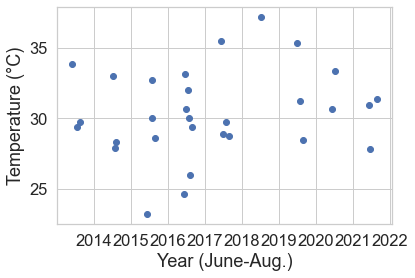

In [80]:
#create scatterplot of the data

BS = lst_cg['Bed-Stuy']
frame = {'Temperature': BS}
BStemps = pd.DataFrame(frame)
plt.plot(BStemps, 'o')
plt.xlabel("Year (June-Aug.)")
plt.ylabel("Temperature (\N{DEGREE SIGN}C)")

In [36]:
lst_cg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2013-06-01 to NaT
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Bed-Stuy                             30 non-null     float64
 1   Myrtle Village CG                    30 non-null     float64
 2   Umoja CG                             30 non-null     float64
 3   Hattie Carthan CG                    30 non-null     float64
 4   All People's Church CG               30 non-null     float64
 5   American Heart CG                    30 non-null     float64
 6   Bedford Stuyvesant CG                30 non-null     float64
 7   Citizens for a Better CG             30 non-null     float64
 8   Clifton Place Memorial CG            30 non-null     float64
 9   Feeding Tree CG                      30 non-null     float64
 10  First Quincy CG                      30 non-null     float64
 11  Garden of Angels CG  

In [37]:
stat_lst=lst_cg.describe()
#m_lst=stat_lst("mean")
display(stat_lst)
#lst_cg.info

,Bed-Stuy,Myrtle Village CG,Umoja CG,Hattie Carthan CG,All People's Church CG,American Heart CG,Bedford Stuyvesant CG,Citizens for a Better CG,Clifton Place Memorial CG,Feeding Tree CG,...,Saratoga Farm,Central Bainbridge Street CG,Bed-Stuy Farm,Hull Street (NYRP) CG,Hull Street CG,Marge Matthews Garden,F.A.R.R. CG,Seasons of Vision Garden,Garden of Plenty,Garden of Life
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000
mean,30.392833,31.123200,30.922900,29.982633,30.221700,31.375833,30.148400,31.164600,29.969567,30.612667,...,31.331433,29.346733,29.346733,31.079800,28.910867,30.693067,30.229300,30.720300,32.27480,31.707767
std,3.090523,3.243932,3.161707,3.006757,3.127951,3.222179,3.021269,3.481135,3.166256,3.148631,...,3.229059,3.560205,3.560205,3.248834,3.463553,3.158825,3.136655,3.290226,3.36643,3.368348
min,23.202000,23.158000,23.835000,22.791000,22.890000,24.003000,23.575000,24.623000,22.421000,23.361000,...,24.326000,20.787000,20.787000,23.930000,21.043000,23.795000,23.635000,23.917000,25.34600,24.793000
25%,28.663750,29.225250,29.081000,28.148000,28.308250,29.491500,28.290000,29.171250,28.011500,28.858500,...,29.283500,27.766000,27.766000,29.102250,27.304250,28.801500,28.178250,28.899500,30.05925,29.707750
50%,30.004500,31.230000,30.910500,30.064500,30.001500,30.968000,29.757000,30.929500,29.976500,30.387500,...,31.261500,29.176500,29.176500,31.295000,28.819000,30.583000,30.242000,30.831000,32.50850,31.733500
75%,32.546750,33.075500,32.595250,32.054500,32.538000,33.666000,32.308750,33.744000,32.185500,33.010000,...,33.091750,31.385500,31.385500,33.131000,30.796750,32.437500,32.248500,32.711750,34.51075,34.024500
max,37.183000,38.353000,37.916000,36.747000,36.979000,38.660000,36.650000,38.384000,36.465000,37.378000,...,38.528000,36.769000,36.769000,38.136000,35.920000,37.454000,37.063000,38.190000,39.49000,39.553000


In [38]:
#convert to fahrenheit- c*1.8+32 
lst_fcg_na=lst_cg*1.8+32
#display(lst_fcg)
lst_fcg=lst_fcg_na.dropna()

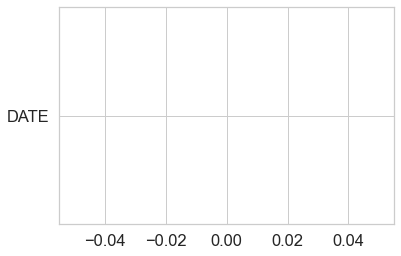

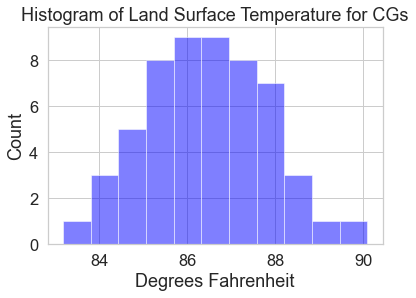

In [39]:
#operate mean over each column, each cg 
mf_lst=lst_fcg.mean() 
#operate each mean over the row (1), date 
mf_lst2=lst_fcg.mean(1)

#display(mf_lst)

n,bins,patches=plt.hist(mf_lst,11,facecolor='blue', alpha=0.5)
# add a 'best fit' line
#y = mlab.normpdf(bins, mu, sigma)
#plt.plot(bins, y, 'r--')
plt.xlabel('Degrees Fahrenheit')
plt.ylabel('Count')
plt.title(r'Histogram of Land Surface Temperature for CGs')
          #$\mu=100$, $\sigma=15$')

plt.show()



In [40]:
ndvi_cg=pd.read_csv("C:/Users/carol/Desktop/Python_22/NDVI_Avg.csv",
# Make sure the dates import in datetime format
parse_dates=['DATE_ACQUIRED'],
# Set DATE as the index so you can subset data by time period
index_col=['DATE_ACQUIRED'],
# Mask no data values so they are not plotted / used in analysis
na_values=['999.99'])

ndvi_cg.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/carol/Desktop/Python_22/NDVI_Avg.csv'

In [10]:
stat_ndvi=ndvi_cg.describe()
#if exluding the (), it will give one mean instead 
m_ndvi=ndvi_cg.mean()

#display(stat_ndvi)
display(m_ndvi)

Bed-Stuy                               0.140367
Myrtle Village CG                      0.232400
Umoja CG                               0.127867
Hattie Carthan CG                      0.326433
All People's Church CG                 0.132733
American Heart CG                      0.129767
Bedford Stuyvesant CG                  0.194900
Citizens for a Better CG               0.224967
Clifton Place Memorial CG              0.196500
Feeding Tree CG                        0.091467
First Quincy CG                        0.213533
Garden of Angels CG                    0.125767
Garden of Hope CG                      0.184400
Gates Harvest CG                       0.214800
Greene Ave United Neighbors CG         0.134200
Hancock Community Backyard CG          0.243633
Hart to Hart CG                        0.181133
Hattie Carthan Herban Farm CG          0.232367
Heaven's Gate CG                       0.191133
Madison Hill CG                        0.183567
NYCHA-Roosevelt CG                     0

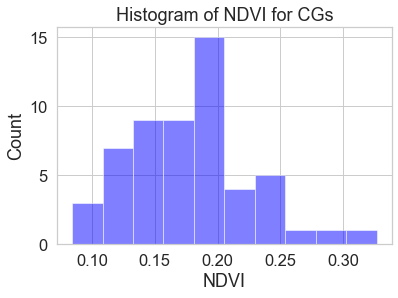

In [11]:
n,bins,patches=plt.hist(m_ndvi,10,facecolor='blue', alpha=0.5)
# add a 'best fit' line
#y = mlab.normpdf(bins, mu, sigma)
#plt.plot(bins, y, 'r--')
plt.xlabel('NDVI')
plt.ylabel('Count')
plt.title(r'Histogram of NDVI for CGs')
          #$\mu=100$, $\sigma=15$')

plt.show()

In [12]:
#display(m_ndvi)

In [13]:
#plot mean of ndvi with confidence band (standard deviations)
sd_ndvi=ndvi_cg.std(1)
md_ndvi=ndvi_cg.mean(1)
d=ndvi_cg.index.values

#display(sd_ndvi)
#display(md_ndvi-sd_ndvi)
display(d)

array(['2013-06-01T00:00:00.000000000', '2013-07-19T00:00:00.000000000',
       '2013-08-20T00:00:00.000000000', '2014-07-06T00:00:00.000000000',
       '2014-07-31T00:00:00.000000000', '2014-08-07T00:00:00.000000000',
       '2015-06-07T00:00:00.000000000', '2015-07-25T00:00:00.000000000',
       '2015-08-03T00:00:00.000000000', '2015-08-26T00:00:00.000000000',
       '2016-06-09T00:00:00.000000000', '2016-06-18T00:00:00.000000000',
       '2016-06-25T00:00:00.000000000', '2016-07-20T00:00:00.000000000',
       '2016-07-27T00:00:00.000000000', '2016-08-12T00:00:00.000000000',
       '2016-08-28T00:00:00.000000000', '2017-06-12T00:00:00.000000000',
       '2017-06-28T00:00:00.000000000', '2017-07-30T00:00:00.000000000',
       '2017-08-24T00:00:00.000000000', '2018-07-10T00:00:00.000000000',
       '2019-06-27T00:00:00.000000000', '2019-07-29T00:00:00.000000000',
       '2019-08-30T00:00:00.000000000', '2020-06-13T00:00:00.000000000',
       '2020-07-06T00:00:00.000000000', '2021-06-16

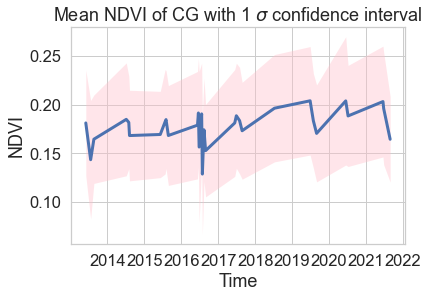

In [14]:
fig, ax = plt.subplots()
ax.plot(d,md_ndvi,linewidth=3)
ax.fill_between(d, md_ndvi - sd_ndvi, md_ndvi + sd_ndvi, alpha=0.4, color='pink', linewidth=0)
plt.xlabel('Time')
plt.ylabel('NDVI')
plt.title(r'Mean NDVI of CG with 1 $\sigma$ confidence interval')
        
plt.show()        

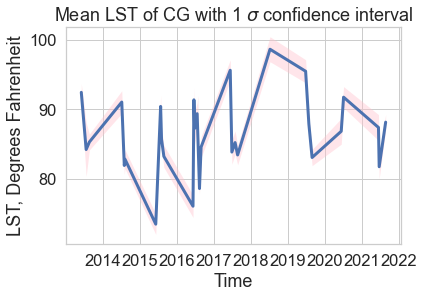

In [15]:
#plot mean of LST with confidence band (standard deviations)
sd_t=lst_fcg.std(1)
md_t=lst_fcg.mean(1)
d=lst_fcg.index.values

#display(sd_ndvi)
#display(md_ndvi-sd_ndvi)
#display(d)

fig, ax = plt.subplots()
ax.plot(d,md_t,linewidth=3)
ax.fill_between(d, md_t - sd_t, md_t + sd_t, alpha=0.4, color='pink', linewidth=0)
plt.xlabel('Time')
plt.ylabel('LST, Degrees Fahrenheit')
plt.title(r'Mean LST of CG with 1 $\sigma$ confidence interval')
        
plt.show()   

In [19]:
#display(lst_fcg)

In [20]:
#display(ndvi_cg)

In [28]:
#scatter plot of LST vs NDVI, for all occurances 

#linear regression lines 
m,b=np.polyfit(lst_fcg,ndvi_cg,1)
f, ax = plt.subplots()
ax.scatter(x=lst_fcg,
           y=ndvi_cg)
plt.plot(lst_fcg, m*lst_fcg+b)
plt.xlabel('LST, Degrees Fahrenheit')
plt.ylabel('NDVI')
plt.title(r'Correlation of LST vs. NDVI')

plt.show()


TypeError: expected 1D vector for x